# Salary Data

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [4]:
df_sal_train=pd.read_csv('D:/Megha/Desktop/DS assignments/Assignment 15 SVM/SalaryData_Train(1).csv')
df_sal_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df_sal_test=pd.read_csv('D:/Megha/Desktop/DS assignments/Assignment 15 SVM/SalaryData_Test(1).csv')
df_sal_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [6]:
a=df_sal_train

In [7]:
b=df_sal_test

In [8]:
df=pd.concat([a,b])
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

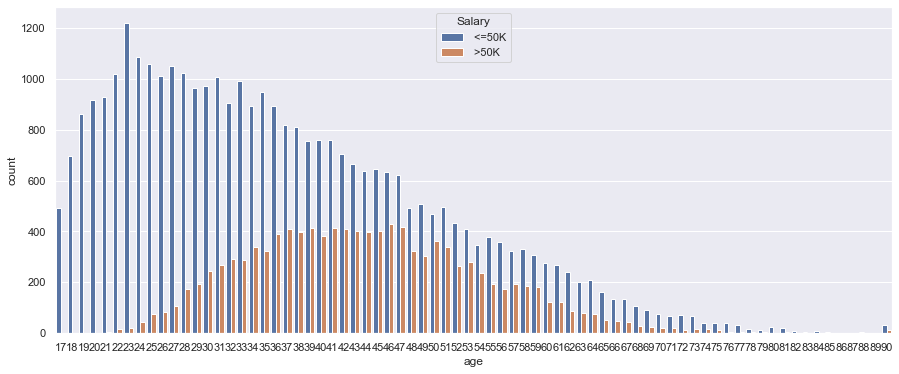

In [9]:
import seaborn as sns
sns.set(rc={"figure.figsize":(15,6)})
sns.countplot(df['age'],hue=df['Salary'])

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='workclass', ylabel='count'>

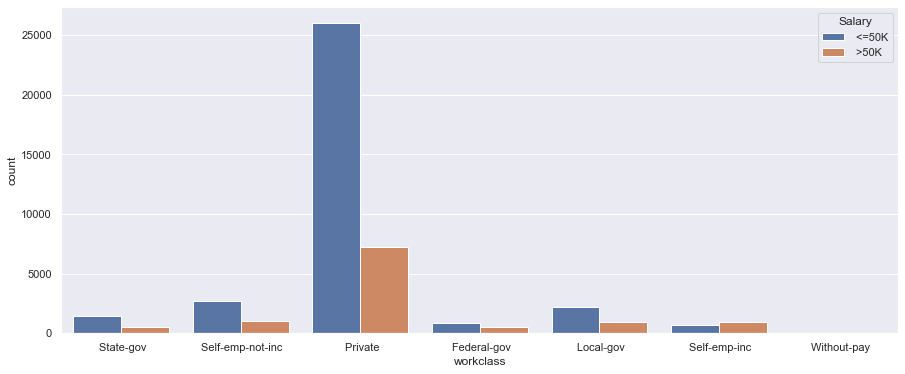

In [10]:
sns.countplot(df['workclass'],hue=df['Salary'])

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

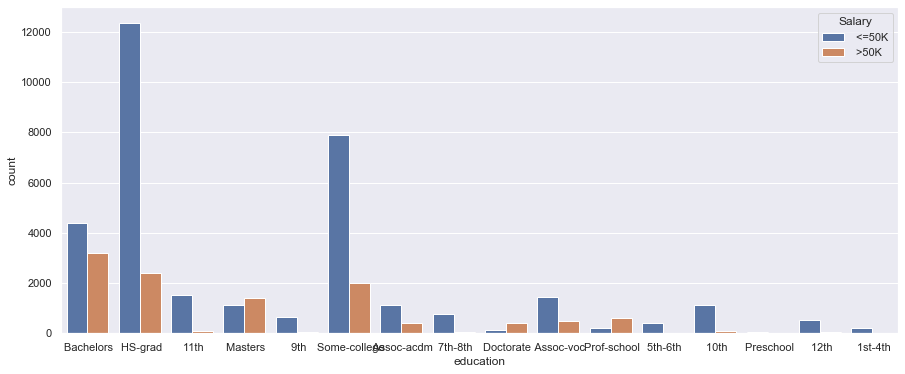

In [11]:
sns.countplot(df['education'],hue=df['Salary'])

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='maritalstatus', ylabel='count'>

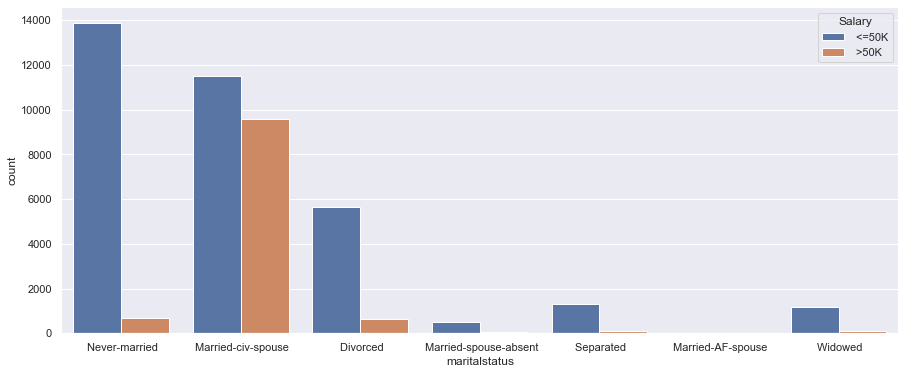

In [12]:
sns.countplot(df['maritalstatus'],hue=df['Salary'])

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='occupation', ylabel='count'>

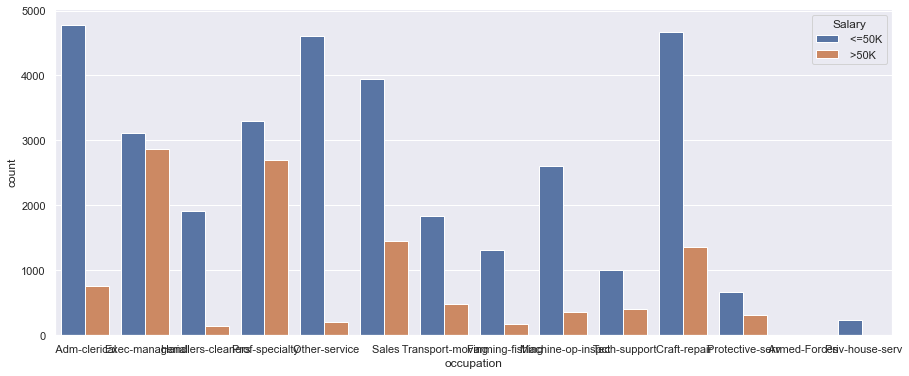

In [13]:
sns.countplot(df['occupation'],hue=df['Salary'])

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='relationship', ylabel='count'>

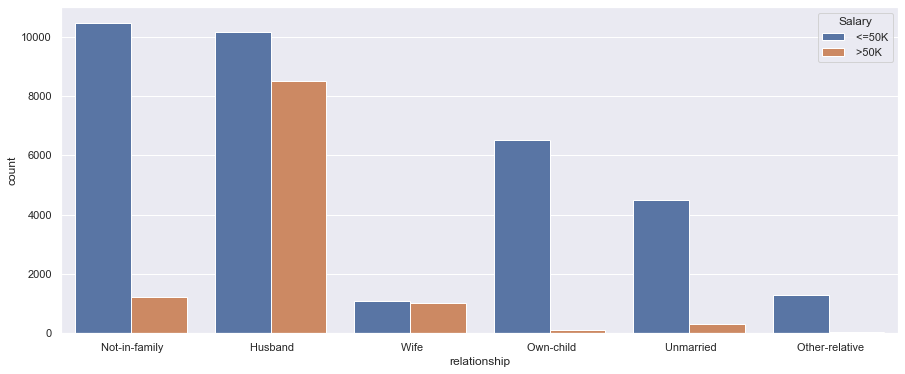

In [14]:
sns.countplot(df['relationship'],hue=df['Salary'])

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='race', ylabel='count'>

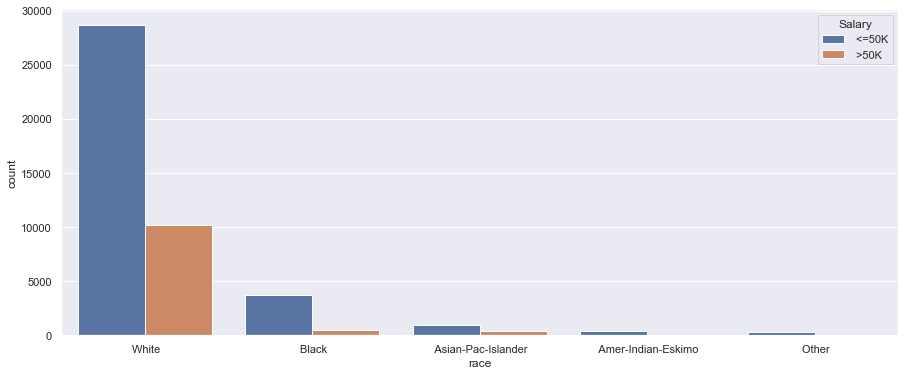

In [15]:
sns.countplot(df['race'],hue=df['Salary'])

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

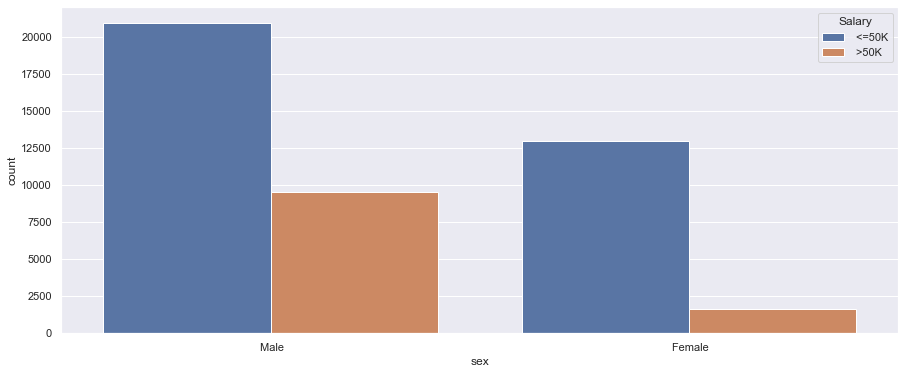

In [16]:
sns.countplot(df['sex'],hue=df['Salary'])

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='native', ylabel='count'>

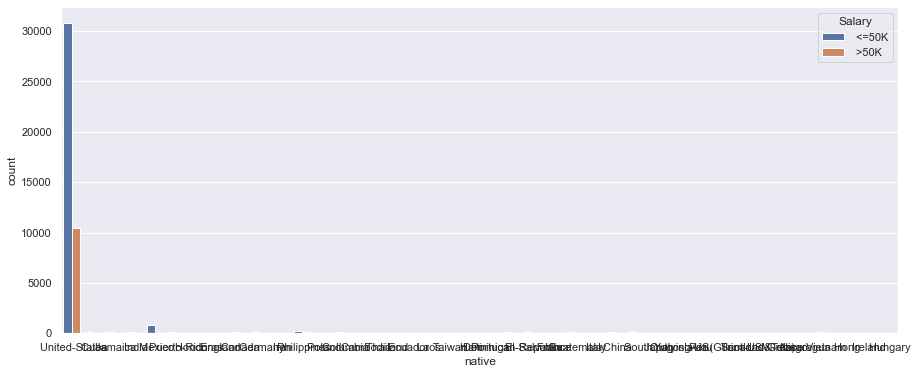

In [17]:
sns.countplot(df['native'],hue=df['Salary'])

In [18]:
df_sal_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [19]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df_sal_train['workclass']=labelencoder.fit_transform(df_sal_train['workclass'])
df_sal_train['education']=labelencoder.fit_transform(df_sal_train['education'])
df_sal_train['maritalstatus']=labelencoder.fit_transform(df_sal_train['maritalstatus'])
df_sal_train['occupation']=labelencoder.fit_transform(df_sal_train['occupation'])
df_sal_train['relationship']=labelencoder.fit_transform(df_sal_train['relationship'])
df_sal_train['race']=labelencoder.fit_transform(df_sal_train['race'])
df_sal_train['sex']=labelencoder.fit_transform(df_sal_train['sex'])
df_sal_train['native']=labelencoder.fit_transform(df_sal_train['native'])
df_sal_train['Salary']=labelencoder.fit_transform(df_sal_train['Salary'])

In [20]:
x_train=df_sal_train.iloc[:,0:13]
x_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37
30157,40,2,11,9,2,6,0,4,1,0,0,40,37
30158,58,2,11,9,6,0,4,4,0,0,0,40,37
30159,22,2,11,9,4,0,3,4,1,0,0,20,37


In [21]:
col_names=x_train.columns.values
col_names

array(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native'], dtype=object)

In [22]:
y_train=df_sal_train.iloc[:,13:14]
y_train

,Salary
0,0
1,0
2,0
3,0
4,0
...,...
30156,0
30157,1
30158,0
30159,0


In [23]:
df_sal_test['workclass']=labelencoder.fit_transform(df_sal_test['workclass'])
df_sal_test['education']=labelencoder.fit_transform(df_sal_test['education'])
df_sal_test['maritalstatus']=labelencoder.fit_transform(df_sal_test['maritalstatus'])
df_sal_test['occupation']=labelencoder.fit_transform(df_sal_test['occupation'])
df_sal_test['relationship']=labelencoder.fit_transform(df_sal_test['relationship'])
df_sal_test['race']=labelencoder.fit_transform(df_sal_test['race'])
df_sal_test['sex']=labelencoder.fit_transform(df_sal_test['sex'])
df_sal_test['native']=labelencoder.fit_transform(df_sal_test['native'])
df_sal_test['Salary']=labelencoder.fit_transform(df_sal_test['Salary'])

In [24]:
x_test=df_sal_test.iloc[:,0:13]
x_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37
15056,39,2,9,13,0,9,1,4,0,0,0,36,37
15057,38,2,9,13,2,9,0,4,1,0,0,50,37
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37


In [25]:
y_test=df_sal_test.iloc[:,13:14]
y_test

,Salary
0,0
1,0
2,1
3,1
4,0
...,...
15055,0
15056,0
15057,0
15058,0


In [26]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
scaler.fit(x_test)
x_test=scaler.transform(x_test)

In [27]:
x_train=pd.DataFrame(x_train,columns=col_names)
x_test=pd.DataFrame(x_test,columns=col_names)

In [28]:
clf=SVC(kernel='linear',C=10,gamma=50)
clf.fit(x_train,y_train)

C:\Users\Megha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=10, gamma=50, kernel='linear')

In [29]:
y_pred=clf.predict(x_train)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [30]:
accuracy_score(y_train,y_pred)

0.8106495142733994

In [31]:
confusion_matrix(y_train,y_pred)

array([[21980,   673],
       [ 5038,  2470]], dtype=int64)

In [32]:
y_pred=clf.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [33]:
accuracy_score(y_test,y_pred)

0.8092297476759628

In [34]:
confusion_matrix(y_test,y_pred)

array([[11008,   352],
       [ 2521,  1179]], dtype=int64)